### Pandas Excercises
https://github.com/guipsamora/pandas_exercises

##### Chipotle

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as style

%matplotlib inline
style.use('seaborn-poster') #sets the size of the charts
style.use('fivethirtyeight')

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [24]:
chipo = pd.read_csv(url, sep="\t")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [10]:
# number of observation
print(chipo.shape[0])
print(chipo.info)

4622


In [15]:
# number of columns
print(chipo.shape[1])
print(len(chipo.columns))

5
5


In [16]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [17]:
chipo.index # index is row

RangeIndex(start=0, stop=4622, step=1)

In [20]:
sum_quantity = chipo.groupby('item_name').sum()
sum_quantity = sum_quantity.sort_values(['quantity'], ascending=False)
print(sum_quantity.head(1))

              order_id  quantity
item_name                       
Chicken Bowl    713926       761


In [21]:
sum_description = chipo.groupby('choice_description').sum()
sum_description = sum_description.sort_values(['quantity'], ascending=False)
print(sum_description.head(1))

                    order_id  quantity
choice_description                    
[Diet Coke]           123455       159


In [22]:
print(sum(sum_description.quantity)) # not all items have description
print(sum(sum_quantity.quantity))

3590
4972


In [23]:
chipo.item_price.dtype

dtype('O')

In [24]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))
chipo.item_price.dtype

dtype('float64')

In [25]:
# how much was the revenue?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

39237.02


In [26]:
# how many orders?
orders = chipo.order_id.value_counts().count()
print(orders)

1834


In [27]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [30]:
items_sold = chipo.item_name.value_counts().count()
print(items_sold)

50


In [20]:
# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])
# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
# select only the item_name and item_price columns
price_per_item = chipo_one_prod[['item_name', 'item_price']]
# sort the values from the most to less expensive
price_per_item.sort_values(by = "item_price", ascending = False).head(5)

,item_name,item_price
92,Steak Crispy Tacos,$9.25
554,Carnitas Crispy Tacos,$9.25
237,Carnitas Soft Tacos,$9.25
56,Barbacoa Soft Tacos,$9.25
8,Steak Soft Tacos,$9.25


In [13]:
chipo.sort_values(by = "item_name").head()

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],$12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],$6.49
1849,749,1,6 Pack Soft Drink,[Coke],$6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],$6.49
2713,1076,1,6 Pack Soft Drink,[Coke],$6.49


In [21]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
2624,1042,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Sour Cream,...",$9.39


In [31]:
len(chipo.quantity[chipo.item_name == "Veggie Salad Bowl"])

18

In [30]:
len(chipo.quantity[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)])

20

[Text(0,0,'Bowl'),
 Text(0,0,'Burrito'),
 Text(0,0,'Barbacoa Salad Bowl'),
 Text(0,0,'Barbacoa Crispy Tacos'),
 Text(0,0,'Barbacoa Soft Tacos'),
 Text(0,0,'6 Pack Soft Drink'),
 Text(0,0,'Barbacoa Bowl'),
 Text(0,0,'Barbacoa Burrito'),
 Text(0,0,'Canned Soda'),
 Text(0,0,'Bottled Water')]

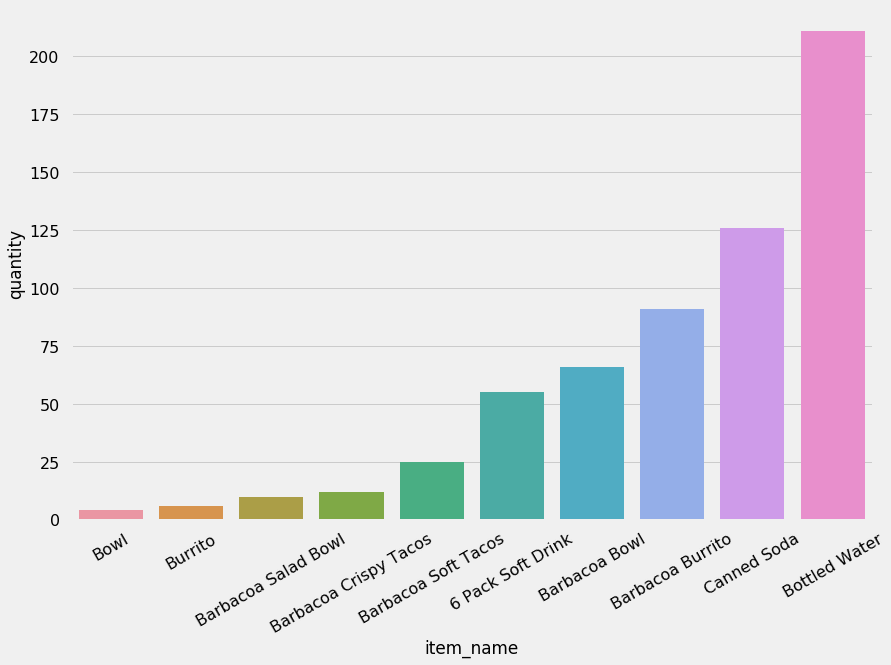

In [84]:
# plot
top_quantity = chipo.groupby("item_name").quantity.sum().head(10)
top_quantity = pd.DataFrame(top_quantity).reset_index().sort_values("quantity")
g = sns.barplot(x="item_name", y="quantity", data=top_quantity)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

#### Occupation

In [33]:
import pandas as pd

In [32]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [34]:
users.head(5)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [35]:
users.tail(5)

,age,gender,occupation,zip_code
user_id,,,,
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209
943,22,M,student,77841


In [39]:
print(users.shape[0])
print(users.shape[1])

943
4


In [40]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [41]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [42]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [45]:
users.occupation.unique()
len(users.occupation.unique())

21

In [46]:
users.occupation.value_counts().head()

student          196
other            105
educator          95
administrator     79
engineer          67
Name: occupation, dtype: int64

In [48]:
users.describe(include="all")

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [49]:
users.age.mean()

34.05196182396607

In [50]:
users.age.value_counts().tail()

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

In [37]:
# mean of age by occupation
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [46]:
# male ratio per occupation, sort descending
def gender_to_num(x):
    if x == "M":
        return 1
    else:
        return 0

users["gender_num"] = users["gender"].apply(gender_to_num)

genders_ratio = users.groupby("occupation").gender_num.sum() / users.occupation.value_counts() * 100
genders_ratio.sort_values(ascending=False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [54]:
users.groupby('occupation').age.agg(['min', 'max', 'mean']).head()

,min,max,mean
occupation,,,
administrator,21,70,38.746835
artist,19,48,31.392857
doctor,28,64,43.571429
educator,23,63,42.010526
engineer,22,70,36.388060


In [57]:
users.groupby(['occupation', 'gender']).age.mean().head()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
Name: age, dtype: float64

In [66]:
# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_ocup.head()

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')
occup_count.head()

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
occup_gender.head()

# present all rows from the 'gender column'
occup_gender.loc[: , 'gender'].head(4)

occupation     gender
administrator  F         45.569620
               M         54.430380
artist         F         46.428571
               M         53.571429
Name: gender, dtype: float64